# Activation functions

A Sigmoid function is a mathematical function which has a characteristic S-shaped curve.sigmoid function is normally used to refer specifically to the logistic function, also called the logistic sigmoid function.
All sigmoid functions have the property that they map the entire number line into a small range such as between 0 and 1, or -1 and 1, so one use of a sigmoid function is to convert a real value into one that can be interpreted as a probability.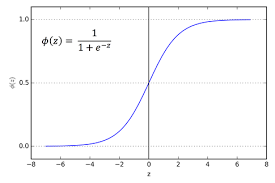

In [ ]:
import math
def sigmoid(x):
    return 1/(1+math.exp(-x))

In [13]:
sigmoid(-5)

0.0066928509242848554

The hyperbolic tangent activation function is also referred to simply as the Tanh (also “tanh” and “TanH“) function.

It is very similar to the sigmoid activation function and even has the same S-shape.

The function takes any real value as input and outputs values in the range -1 to 1. The larger the input (more positive), the closer the output value will be to 1.0, whereas the smaller the input (more negative), the closer the output will be to -1.0.

The Tanh activation function is calculated as follows:

(e^x – e^-x) / (e^x + e^-x)
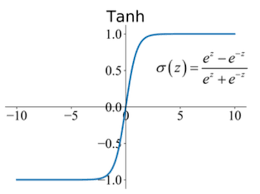

In [14]:
def tanh(x):
    return (math.exp(x)-math.exp(-x)) / (math.exp(x)+math.exp(-x))

In [15]:
tanh(-56)

-1.0

In [16]:
tanh(25)

1.0

As we mentioned earlier, the tanh function is a stretched and shifted version of the sigmoid. Therefore, there are a lot of similarities.

Both functions belong to the S-like functions that suppress the input value to a bounded range. This helps the network to keep its weights bounded and prevents the exploding gradient problem where the value of the gradients becomes very large
When we are using these activation functions in a neural network, our data are usually centered around zero. So, we should focus our attention on the behavior of each gradient in the region near zero.

We observe that the gradient of tanh is four times greater than the gradient of the sigmoid function. This means that using the tanh activation function results in higher values of gradient during training and higher updates in the weights of the network. So, if we want strong gradients and big learning steps, we should use the tanh activation function.

Another difference is that the output of tanh is symmetric around zero leading to faster convergence.
Despite their benefits, both functions present the so-called vanishing gradient problem.

In neural networks, the error is backpropagated through the hidden layers of the network and updates the weights. In case we have a very deep neural network and bounded activation functions like the ones above, the amount of error decreases dramatically after it is backpropagated through each hidden layer. So, at the early layers, the error is almost zero, and the weights of these layers are not updated properly. The ReLU activation function can fix the vanishing gradient problem.
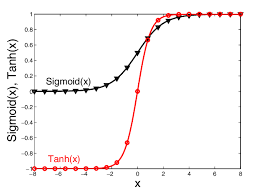


The rectified linear activation function, or ReLU activation function, is perhaps the most common function used for hidden layers.

It is common because it is both simple to implement and effective at overcoming the limitations of other previously popular activation functions, such as Sigmoid and Tanh. Specifically, it is less susceptible to vanishing gradients that prevent deep models from being trained, although it can suffer from other problems like saturated or “dead” units.

The ReLU function is calculated as follows:

max(0.0, x)
This means that if the input value (x) is negative, then a value 0.0 is returned, otherwise, the value is returned.
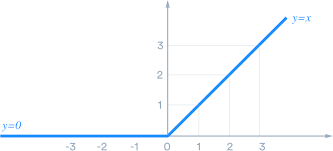

In [17]:
def relu(x):
    return max(0,x)

In [18]:
relu(100)

100

In [19]:
relu(-100)

0

Leaky ReLU function is an improved version of the ReLU activation function. As for the ReLU activation function, the gradient is 0 for all the values of inputs that are less than zero, which would deactivate the neurons in that region and may cause dying ReLU problem.

Leaky ReLU is defined to address this problem. Instead of defining the ReLU activation function as 0 for negative values of inputs(x), we define it as an extremely small linear component of x. Here is the formula for this activation function

f(x)=max(0.01*x , x).
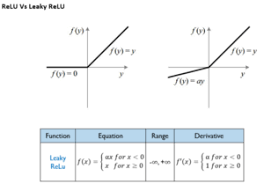


In [21]:
def leaky_relu(x):
    return max(0.1*x,x)

In [22]:
leaky_relu(-100)

-10.0

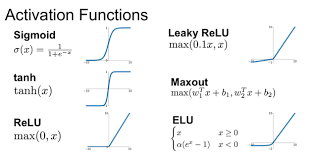

In [34]:
import matplotlib.pyplot as plt

In [40]:
import numpy as np
def gradient_des(x,y):
    m_curr = b_curr =0
    it = 10
    n=len(x)
    learning_r =0.08
    #plt.scatter(x,y,color='red',linewidth='5')
    for i in range (it):
        yp = m_curr * x +b_curr
        cost =(1/n) * sum([val**2 for val in (y-yp)])
        #plt.plot(x,yp,color='green')
        md = -(2/n) * sum(x*(y-yp))
        bd = -(2/n) * sum(y-yp)
        m_curr = m_curr - learning_r * md
        b_curr = b_curr - learning_r *bd
        print("m {} ,   b {}, cost {}, iteration {}".format(m_curr,b_curr,cost,i))
    

x=np.array([1,2,3,4,5])
y=np.array([5,7,9,11,13])


gradient_des(x,y)

m 4.96 ,   b 1.44, cost 89.0, iteration 0
m 0.4991999999999983 ,   b 0.26879999999999993, cost 71.10560000000002, iteration 1
m 4.451584000000002 ,   b 1.426176000000001, cost 56.8297702400001, iteration 2
m 0.892231679999997 ,   b 0.5012275199999995, cost 45.43965675929613, iteration 3
m 4.041314713600002 ,   b 1.432759910400001, cost 36.35088701894832, iteration 4
m 1.2008760606719973 ,   b 0.7036872622079998, cost 29.097483330142282, iteration 5
m 3.7095643080294423 ,   b 1.4546767911321612, cost 23.307872849944438, iteration 6
m 1.4424862661541864 ,   b 0.881337636696883, cost 18.685758762535738, iteration 7
m 3.4406683721083144 ,   b 1.4879302070713722, cost 14.994867596913156, iteration 8
m 1.6308855378034224 ,   b 1.0383405553279617, cost 12.046787238456794, iteration 9
